<a href="https://colab.research.google.com/github/Daniel-ASG/Aulas_de_cursos/blob/main/EDA_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando base de dados**

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('https://s3.amazonaws.com/caelum-online-public/1039-seaborn/material/tips.csv')
dados.sample(3)

,total_bill,tip,dessert,day,time,size
206,26.59,3.41,Yes,Sat,Dinner,3
1,10.34,1.66,No,Sun,Dinner,3
147,11.87,1.63,No,Thur,Lunch,2


# **Tradução** 

In [3]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [4]:
renomear = {'total_bill': 'Valor_da_conta', 
            'tip': 'Gorjeta', 
            'dessert': 'Sobremesa', 
            'day': 'Dia_da_semana', 
            'time': 'Hora_do_dia', 
            'size': 'Total_de_pessoas'}

In [5]:
gorjetas = dados.rename(columns=renomear)

In [6]:
gorjetas.sample(3)

,Valor_da_conta,Gorjeta,Sobremesa,Dia_da_semana,Hora_do_dia,Total_de_pessoas
219,30.14,3.09,Yes,Sat,Dinner,4
70,12.02,1.97,No,Sat,Dinner,2
2,21.01,3.50,No,Sun,Dinner,3


In [7]:
gorjetas.Sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
sim_não = {'No': 'Não',
          'Yes': 'Sim'}

In [9]:
gorjetas.Sobremesa.map(sim_não)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: Sobremesa, Length: 244, dtype: object

In [10]:
gorjetas.Sobremesa = gorjetas.Sobremesa.map(sim_não)
gorjetas.head(1)

,Valor_da_conta,Gorjeta,Sobremesa,Dia_da_semana,Hora_do_dia,Total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [11]:
gorjetas.Dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [12]:
dias = {'Sun': 'Domingo', 
        'Sat': 'Sábado', 
        'Thur': 'Quinta', 
        'Fri': 'Sexta'}

In [13]:
gorjetas.Dia_da_semana = gorjetas.Dia_da_semana.map(dias)
gorjetas.head(1)

,Valor_da_conta,Gorjeta,Sobremesa,Dia_da_semana,Hora_do_dia,Total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [14]:
gorjetas.Hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [15]:
hora = {'Dinner': 'Jantar', 
        'Lunch': 'Almoço'}

In [16]:
gorjetas.Hora_do_dia = gorjetas.Hora_do_dia.map(hora)
gorjetas.head(1)

,Valor_da_conta,Gorjeta,Sobremesa,Dia_da_semana,Hora_do_dia,Total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# **Importando o Seaborn**

In [17]:
import seaborn as sns

# **Análise 1 - Valor da conta e gorjeta**

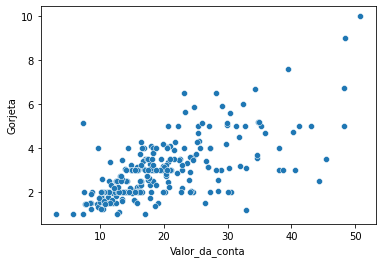

In [27]:
sns.scatterplot(x='Valor_da_conta', y='Gorjeta', data=gorjetas);

**Visualmente, o valor da gorjeta aumenta conforme o valor da conta**

In [19]:
print(f'A base de dados contém {gorjetas.shape[0]} registros.\n')
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros.

Registros não nulos


Valor_da_conta      244
Gorjeta             244
Sobremesa           244
Dia_da_semana       244
Hora_do_dia         244
Total_de_pessoas    244
dtype: int64

## **Criando o campo porcentagem**

In [22]:
gorjetas['porcentagem'] = (gorjetas.Gorjeta / gorjetas.Valor_da_conta)
gorjetas.head(3)

,Valor_da_conta,Gorjeta,Sobremesa,Dia_da_semana,Hora_do_dia,Total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587


In [23]:
gorjetas.porcentagem = (gorjetas.porcentagem*100).round(2)
gorjetas.head(3)

,Valor_da_conta,Gorjeta,Sobremesa,Dia_da_semana,Hora_do_dia,Total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66


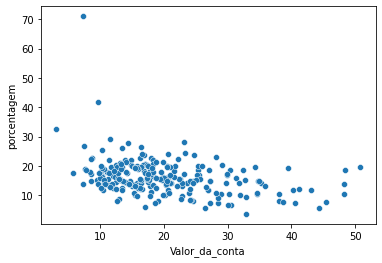

In [24]:
porcentagem_conta = sns.scatterplot(x='Valor_da_conta', y='porcentagem', data = gorjetas)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

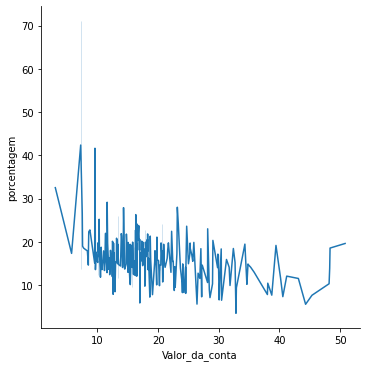

In [25]:
porcentagem_conta_linha = sns.relplot(x='Valor_da_conta', y='porcentagem', data = gorjetas, kind='line')

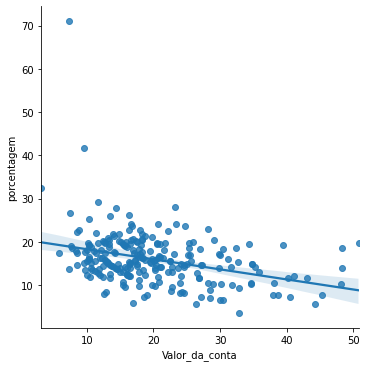

In [28]:
sns.lmplot(x='Valor_da_conta', y='porcentagem', data = gorjetas);

# **Análise 2 - Sobremesa**

In [29]:
gorjetas[gorjetas.Sobremesa == 'Sim'].describe()

,Valor_da_conta,Gorjeta,Total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.319140
std,9.832154,1.401468,0.810751,8.511748
min,3.070000,1.000000,1.000000,3.560000
25%,13.420000,2.000000,2.000000,10.680000
50%,17.920000,3.000000,2.000000,15.380000
75%,26.860000,3.680000,3.000000,19.510000
max,50.810000,10.000000,5.000000,71.030000


In [30]:
gorjetas[gorjetas.Sobremesa == 'Não'].describe()

,Valor_da_conta,Gorjeta,Total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.932318
std,8.255582,1.377190,1.017984,3.990701
min,7.250000,1.000000,1.000000,5.680000
25%,13.325000,2.000000,2.000000,13.690000
50%,17.590000,2.740000,2.000000,15.560000
75%,22.755000,3.505000,3.000000,18.500000
max,48.330000,9.000000,6.000000,29.200000


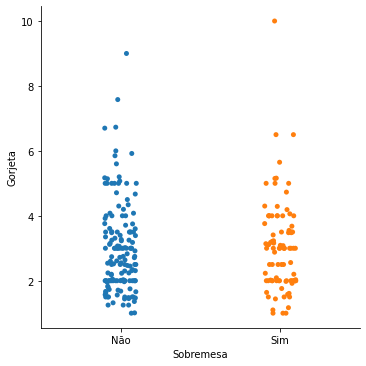

In [34]:
sns.catplot(x='Sobremesa', y='Gorjeta', data=gorjetas);

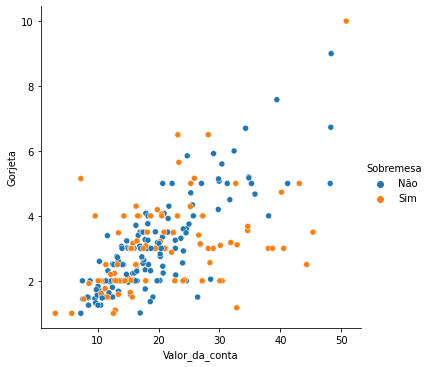

In [35]:
sns.relplot(x='Valor_da_conta', y='Gorjeta', hue='Sobremesa', data=gorjetas);

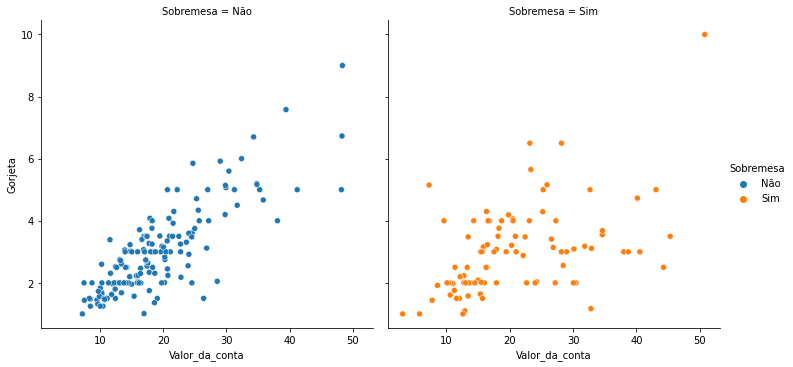

In [38]:
sns.relplot(x='Valor_da_conta', y='Gorjeta', hue='Sobremesa', col='Sobremesa', data=gorjetas);

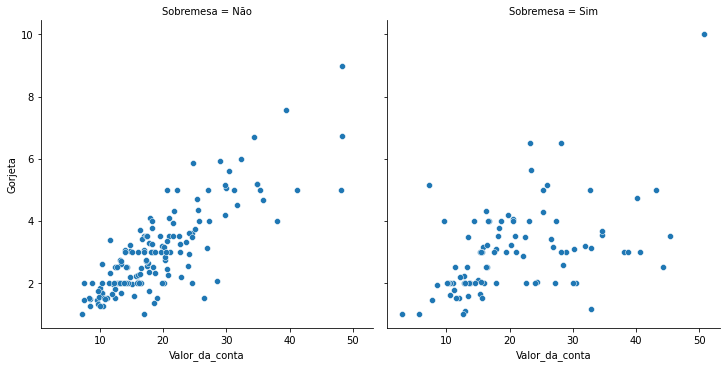

In [39]:
sns.relplot(x='Valor_da_conta', y='Gorjeta', col='Sobremesa', data=gorjetas);

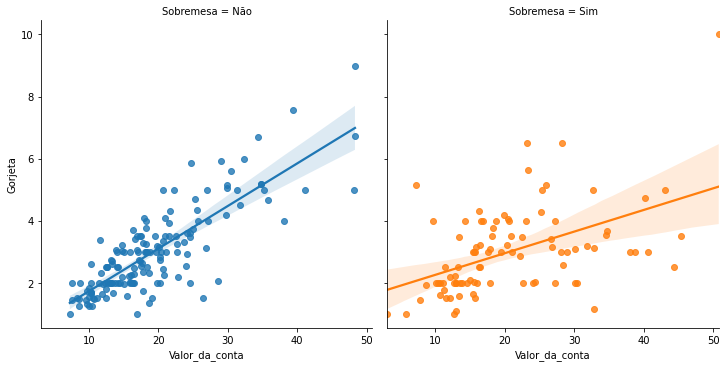

In [41]:
sns.lmplot(x='Valor_da_conta', y='Gorjeta', col='Sobremesa', hue='Sobremesa', data=gorjetas);

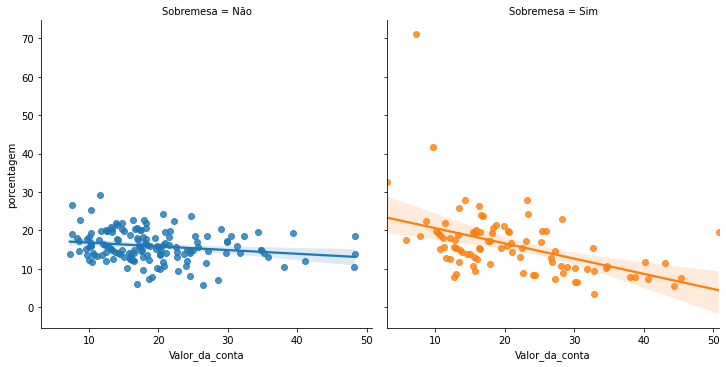

In [42]:
sns.lmplot(x='Valor_da_conta', y='porcentagem', col='Sobremesa', hue='Sobremesa', data=gorjetas);

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

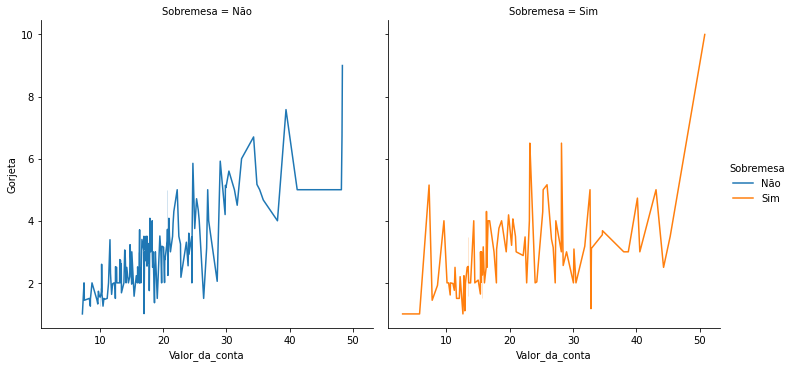

In [43]:
sns.relplot(x='Valor_da_conta', y='Gorjeta', col='Sobremesa', hue='Sobremesa', kind='line', data=gorjetas);

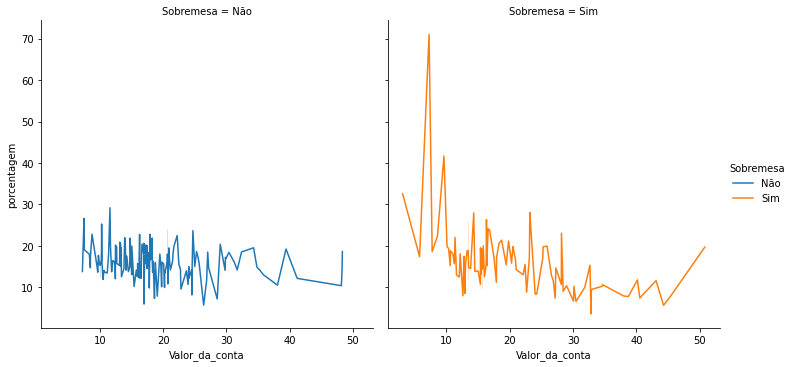

In [44]:
sns.relplot(x='Valor_da_conta', y='porcentagem', col='Sobremesa', hue='Sobremesa', kind='line', data=gorjetas);

## **Teste de hipótese**

**H<sup>null</null>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</null>**

> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [45]:
from scipy.stats import ranksums

In [46]:
sobremesa = gorjetas.query('Sobremesa == "Sim"').porcentagem

In [47]:
sem_sobremesa = gorjetas.query('Sobremesa == "Não"').porcentagem

In [49]:
r = ranksums(sobremesa, sem_sobremesa)

In [50]:
print(f'O valor do p-value é {r.pvalue}')

O valor do p-value é 0.558850059321255


**H<sup>null</null>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# **Análise 3 - Dias da semana**

In [52]:
gorjetas.head(3)

,Valor_da_conta,Gorjeta,Sobremesa,Dia_da_semana,Hora_do_dia,Total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66


In [51]:
gorjetas.Dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

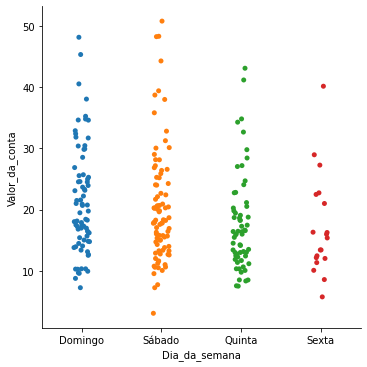

In [54]:
sns.catplot(x='Dia_da_semana', y='Valor_da_conta', data=gorjetas);

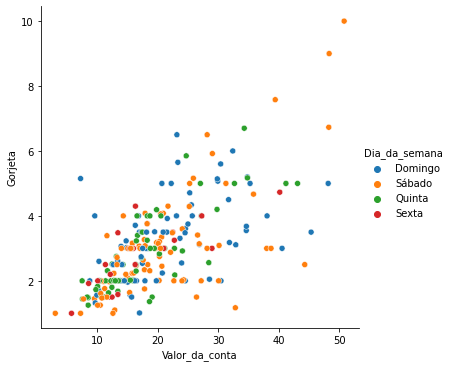

In [56]:
sns.relplot(x='Valor_da_conta', y='Gorjeta', hue='Dia_da_semana', data=gorjetas);

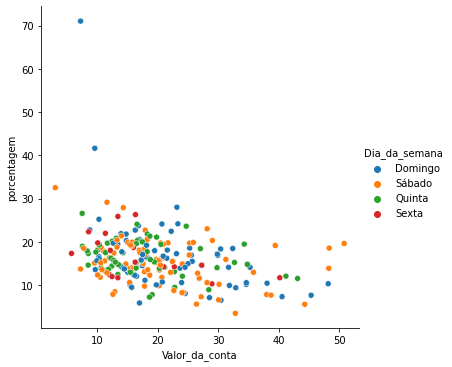

In [57]:
sns.relplot(x='Valor_da_conta', y='porcentagem', hue='Dia_da_semana', data=gorjetas);

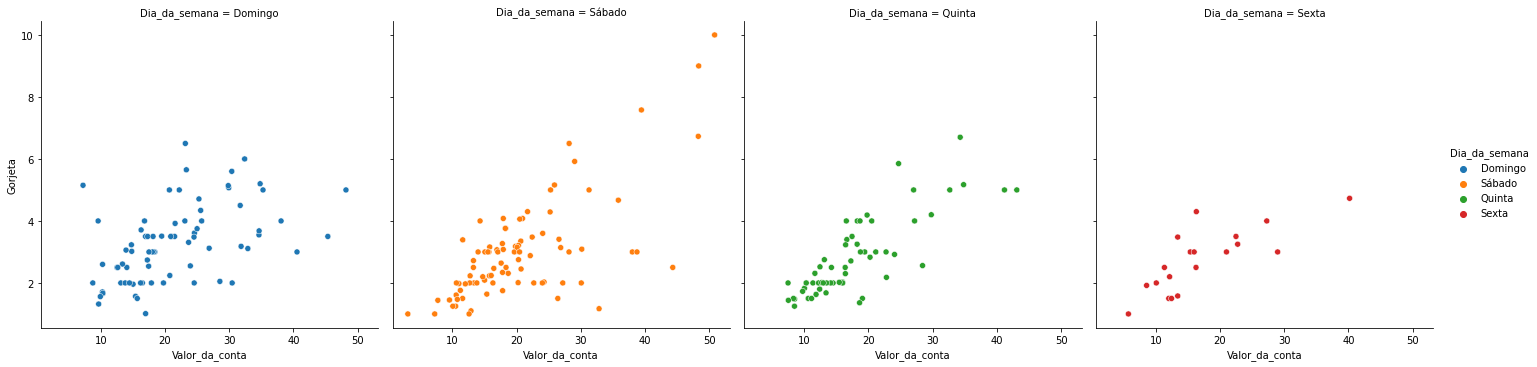

In [58]:
sns.relplot(x='Valor_da_conta', y='Gorjeta', hue='Dia_da_semana', col='Dia_da_semana', data=gorjetas);

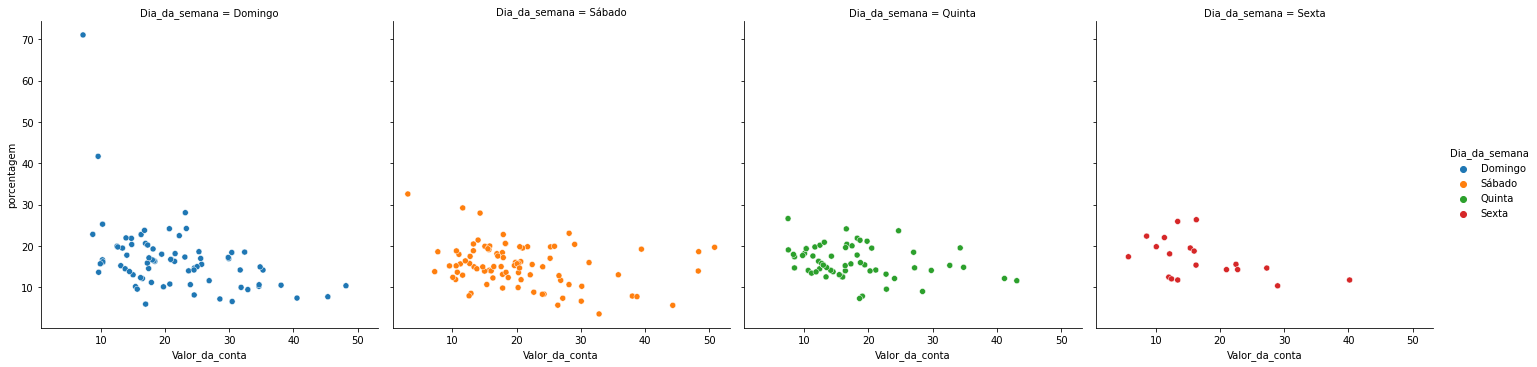

In [59]:
sns.relplot(x='Valor_da_conta', y='porcentagem', hue='Dia_da_semana', col='Dia_da_semana', data=gorjetas);

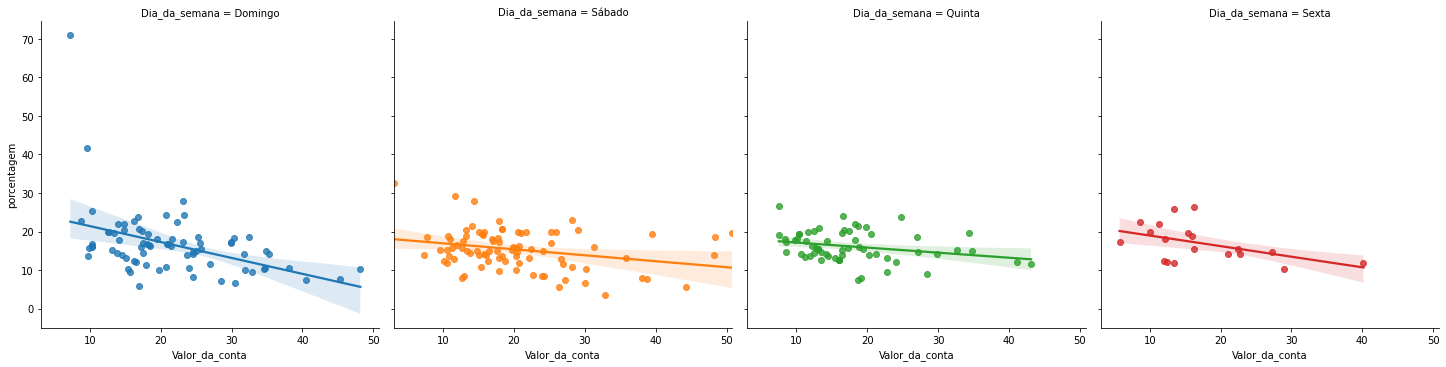

In [60]:
sns.lmplot(x='Valor_da_conta', y='porcentagem', hue='Dia_da_semana', col='Dia_da_semana', data=gorjetas);

In [61]:
media_geral_gorjetas = gorjetas.Gorjeta.mean()

In [66]:
print(f'A média geral das gorjetas é de ${media_geral_gorjetas:.3f}')

A média geral das gorjetas é de $2.998


In [68]:
gorjetas.groupby(['Dia_da_semana']).mean()[['Valor_da_conta', 'Gorjeta', 'porcentagem']]

,Valor_da_conta,Gorjeta,porcentagem
Dia_da_semana,,,
Domingo,21.410000,3.255132,16.689605
Quinta,17.682742,2.771452,16.126452
Sexta,17.151579,2.734737,16.991579
Sábado,20.441379,2.993103,15.314598


In [70]:
print('Frequência dos dias')
gorjetas.Dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: Dia_da_semana, dtype: int64

## **Teste de hipótese**

**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [71]:
valor_conta_domingo = gorjetas.query('Dia_da_semana == "Domingo"').Valor_da_conta
valor_conta_sabado = gorjetas.query('Dia_da_semana == "Sábado"').Valor_da_conta

In [74]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f'O valor de p-value é {r2.pvalue}')

O valor de p-value é 0.3576728477868443


**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no sábado e no domingo**

# **Análise 4 - Hora do dia**

In [75]:
gorjetas.Hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

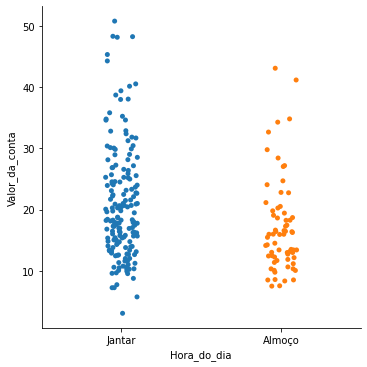

In [77]:
sns.catplot(x='Hora_do_dia', y='Valor_da_conta', data=gorjetas);

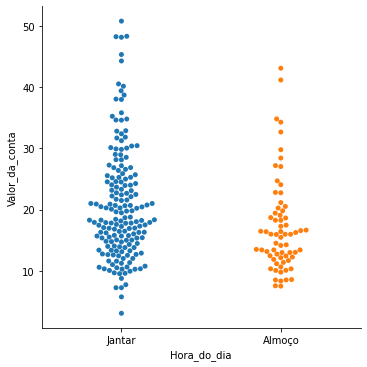

In [78]:
sns.catplot(x='Hora_do_dia', y='Valor_da_conta', kind='swarm', data=gorjetas);

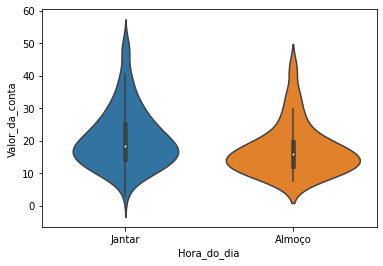

In [79]:
sns.violinplot(x='Hora_do_dia', y='Valor_da_conta', data=gorjetas);

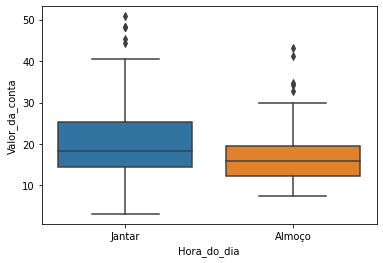

In [80]:
sns.boxplot(x='Hora_do_dia', y='Valor_da_conta', data=gorjetas);

In [84]:
almoco = gorjetas.query('Hora_do_dia == "Almoço"').Valor_da_conta

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


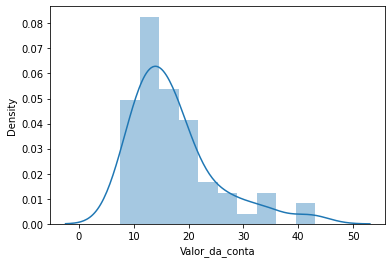

In [89]:
sns.distplot(almoco);

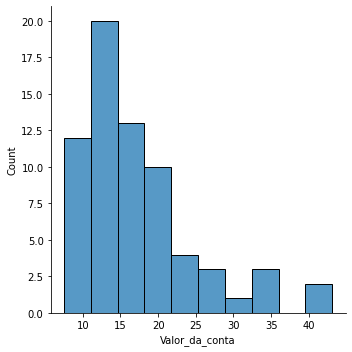

In [90]:
sns.displot(almoco);

In [91]:
jantar = gorjetas.query('Hora_do_dia == "Jantar"').Valor_da_conta

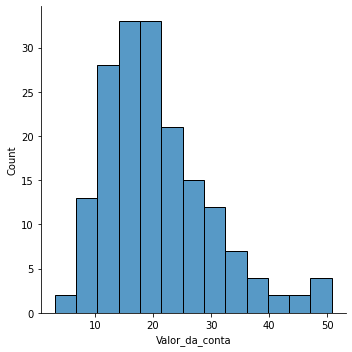

In [94]:
sns.displot(jantar);

In [96]:
gorjetas.groupby(['Hora_do_dia']).mean()[['Valor_da_conta', 'Gorjeta', 'porcentagem']]

,Valor_da_conta,Gorjeta,porcentagem
Hora_do_dia,,,
Almoço,17.168676,2.728088,16.411765
Jantar,20.797159,3.102670,15.951477


## **Teste de hipótese**

**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoço**

In [99]:
r3 = ranksums(jantar, almoco)
print(f'O valor do p-value é de {r3.pvalue}')

O valor do p-value é de 0.0011791039723641672


**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoço**

## **Teste de hipótese 2**

**H<sup>null</sup>**
> **A distribuição do valor da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**
> **A distribuição do valor da gorjeta não é igual no jantar e no almoço**

In [102]:
porcentagem_almoço = gorjetas.query('Hora_do_dia == "Almoço"').porcentagem
porcentagem_jantar = gorjetas.query('Hora_do_dia == "Jantar"').porcentagem

In [104]:
r4 = ranksums(porcentagem_almoço, porcentagem_jantar)
print(f'O valor do p-value é de {r4.pvalue}')

O valor do p-value é de 0.22831951519679017


**H<sup>null</sup>**
> **A distribuição do valor da gorjeta é igual no jantar e no almoço**